In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exploration_rate        = 1.0           # epsilon_0
max_exploration_rate    = 1.0           # epsilon_max
min_exploration_rate    = 0.001         # epsilon_min
exploration_decay_rate  = 0.001         # epsilon = epsilon_min * exp(-decay * time)

discount_rate           = 0.99          # gamma
learning_rate           = 0.1           # alpha

num_episodes            = 10_000        # total number of episodes
max_steps_per_episode   = 100           # maximum number of steps per episode

In [3]:
mass = 1
g = 9.8

In [4]:
number_of_states = 100
no_of_actions = 3

q_table = np.zeros((number_of_states, no_of_actions))
print(q_table.shape)

(100, 3)


In [5]:
action_spaces = np.array([0.0, 0.1, -0.1])
dt = 0.05
final_altitude = 5

In [6]:
def get_closest_action_idx(action):
    if (action < -0.5):
        return 2
    elif (action < 0.5):
        return 1
    else:
        return 0

def sigmoid(x):
    denom = 1 + np.exp(-x)
    return (1/denom)

def get_state(err):
    sig_err = sigmoid(err)
    return min(int(sig_err * 100), 99)

def get_reward(err):
    if (err < 0.01):
        return 1
    elif (err < 0.1):
        return 0
    elif (err < 1):
        return -1
    else:
        return -2

def get_error(delta_alt, delta_alt_prev):
    delta_d = delta_alt - delta_alt_prev
    v = delta_d / dt
    e = delta_alt + v
    return e

In [7]:
rewards_all_episodes = []
proportional_constants = []

for episode in range(num_episodes):
    state = 0
    kp = 0
    delta_alt_prev = 0
    reward_current_episode = 0
    altitudes = [0]
    time = 0

    for step in range(max_steps_per_episode):
        exploration_rate_threshold = np.random.uniform()
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = np.random.choice(action_spaces)
    
        thrust = kp * (final_altitude - altitudes[-1])
        acceleration = thrust/mass - g
        delta_alt = acceleration * time * dt
        kp += action

        err = get_error(delta_alt, delta_alt_prev)
        reward = get_reward(err)
        new_state = get_state(err)
        idx = get_closest_action_idx(action)

        q_table[state, idx] = q_table[state, idx]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[new_state, :]))
        state = new_state
        reward_current_episode += reward
        altitudes.append(altitudes[-1]+delta_alt)
        delta_alt_prev = delta_alt
        time += dt

    exploration_rate = min_exploration_rate + (max_exploration_rate-min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    proportional_constants.append(kp)
    rewards_all_episodes.append(reward_current_episode)

/tmp/ipykernel_53669/3112244868.py:10: RuntimeWarning: overflow encountered in exp
  denom = 1 + np.exp(-x)


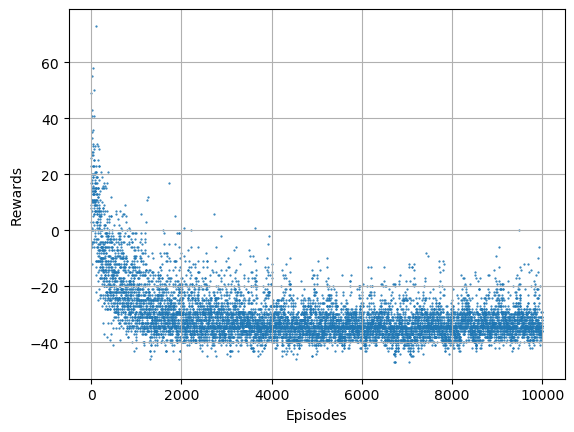

In [8]:
plt.scatter(range(len(rewards_all_episodes)), rewards_all_episodes, s=0.3)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.grid()
plt.show()

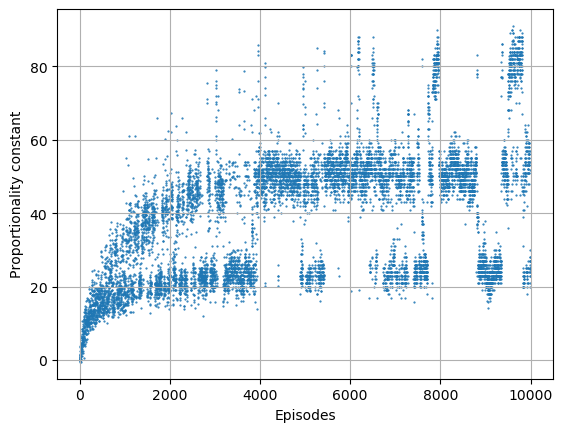

In [9]:
plt.scatter(range(len(proportional_constants)), proportional_constants, s=0.3)
plt.xlabel("Episodes")
plt.ylabel("Proportionality constant")
plt.grid()
plt.show()

In [10]:
idx = np.argmin(rewards_all_episodes)
print(rewards_all_episodes[idx])
print(proportional_constants[idx])

-47
49.9
